In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("Clusterlabel_Jan_Dec_2019.csv", encoding="utf-8", sep=",", index_col="CustID")

In [15]:
df.head()

,Customer_ID,LPD,FPD,Tenure,Recency,Frequency,Monetary,numProduct,City,Cluster
CustID,,,,,,,,,,
0,10993,2019-08-22,2019-08-22,0,131,1,1797.0,1,Gurgaon,1
1,6206,2019-12-27,2019-08-02,147,4,6,5324.7,6,['Mumbai' 'Pune'],5
2,2278,2019-08-23,2019-08-22,1,130,3,3861.0,3,Chandigaeh,1
3,3867,2019-08-23,2019-08-23,0,130,1,0.0,1,Dehradun,1
4,4675,2019-08-23,2019-08-23,0,130,1,1617.0,1,Amritsar,1


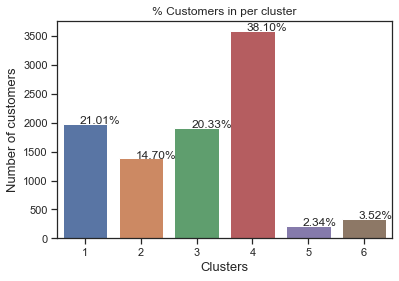

In [16]:

ax = sns.countplot(x="Cluster", data=df)
plt.title('% Customers in per cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of customers')

total = len(df['Cluster'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()-.5
        y = p.get_y() + p.get_height()+2
        ax.annotate(percentage, (x, y))
plt.savefig("Customers per cluster.jpg")
plt.show()


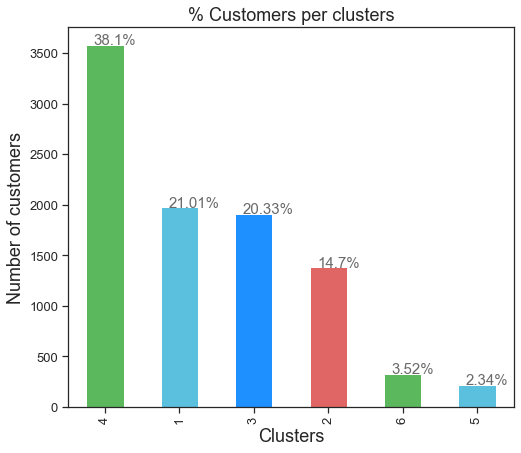

In [17]:
colors = ['#5cb85c','#5bc0de','#1e90ff','#e06666']
ax = df['Cluster'].value_counts().plot(kind='bar', color=colors,figsize=(8,7),fontsize=13);
ax.set_alpha(0.8)
ax.set_title("% Customers per clusters", fontsize=18)
ax.set_ylabel("Number of customers", fontsize=18);
ax.set_xlabel("Clusters", fontsize=18);


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
plt.savefig("Customers per clusters1.jpg")

In [18]:
df_longform = pd.melt(df, id_vars="Cluster")
df_longform["Cluster"] = df_longform["Cluster"].astype("str")

In [19]:
df_longform.head()

,Cluster,variable,value
0,1,Customer_ID,10993
1,5,Customer_ID,6206
2,1,Customer_ID,2278
3,1,Customer_ID,3867
4,1,Customer_ID,4675


In [20]:
def show_count (dataframe, var, title, labeliv, rot, output_path=None):
    g = sns.factorplot(x=var, data=dataframe, kind="count",
                      palette="inferno", size=4, aspect=1.6, order=[1,2,3,4,5,6])

    plt.title(title+"\n", size=20, x=0.45)
    g.set_xticklabels(step=labeliv)
    g.set_xticklabels(rotation=rot)
    plt.ylabel("Number of customers")
    
    def set_style():
        rc = {"axes.labelsize": 13, "xtick.labelsize": 11, "ytick.labelsize": 11}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")
    
    set_style()
    plt.show()
    
    if output_path is not None:
        g.savefig(output_path,dpi=350)

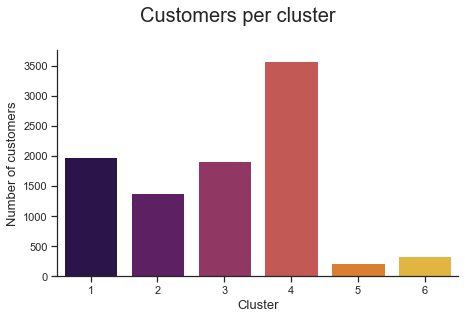

In [21]:
show_count(df,"Cluster","Customers per cluster",1,0,"count_customers per cluster")

In [22]:
def show_box(feature, title, output_path=None):
    g = sns.factorplot(x="Cluster", y=feature, data=df, kind="box",
                       size=4, aspect=2, order=[1,2,3,4,5,6], fliersize=0, palette="CMRmap")
    
    fig = plt.gcf()
    plt.title(title+"\n", fontsize=20, x=0.45)
    plt.ylabel(feature)
    
    def set_style():
        rc = {"axes.labelsize": 13, "xtick.labelsize": 11, "ytick.labelsize": 11}
        sns.set(font="Arial",rc=rc)
        sns.set_style("ticks")
        
    set_style()
    
    if output_path is not None:
        plt.draw()
        fig.savefig(output_path, dpi=350,
                    bbox_inches="tight", frameon=True)

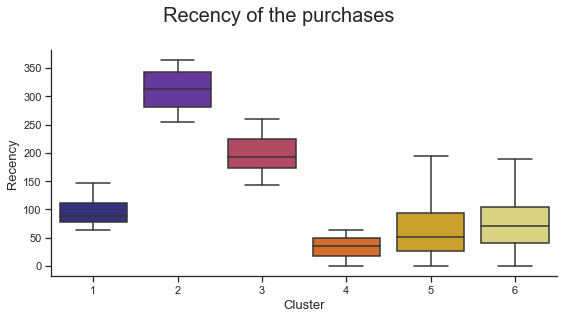

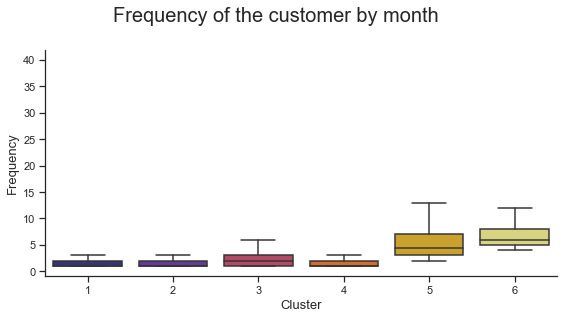

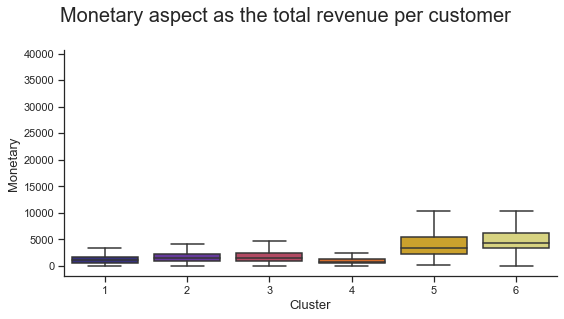

In [23]:
show_box("Recency", "Recency of the purchases","box_recency")
show_box("Frequency", "Frequency of the customer by month","box_frequency")
show_box("Monetary", "Monetary aspect as the total revenue per customer","box_monetary")
#show_box("Profit", "Profit per cluster","box_profit")